<a href="https://colab.research.google.com/github/Malbasahi/OIBSIP-Sales_Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sales Prediction**

In [107]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from sklearn.decomposition import PCA

In [91]:
# Load the dataset
data = pd.read_csv("Advertising.csv")

In [92]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [93]:
data.head

<bound method NDFrame.head of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [94]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [95]:
print(data.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [96]:
# Data Cleaning and Preprocessing
# Check for missing values
missing_values = data.isnull().sum()
# Drop any rows with missing values (if necessary)
data = data.dropna()

In [97]:
# Preprocess the data
X = data[["TV", "Radio", "Newspaper"]]
y = data["Sales"]

In [98]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Data Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

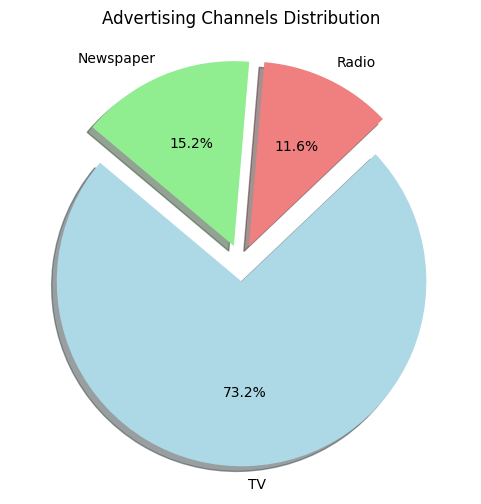

In [54]:
# Create a pie chart to show the distribution of sales
labels = ['TV', 'Radio', 'Newspaper']
sizes = data[['TV', 'Radio', 'Newspaper']].sum()
colors = ['lightblue', 'lightcoral', 'lightgreen']
explode = (0.1, 0.1, 0.1)  # explode all slices for emphasis
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Advertising Channels Distribution')
plt.show()

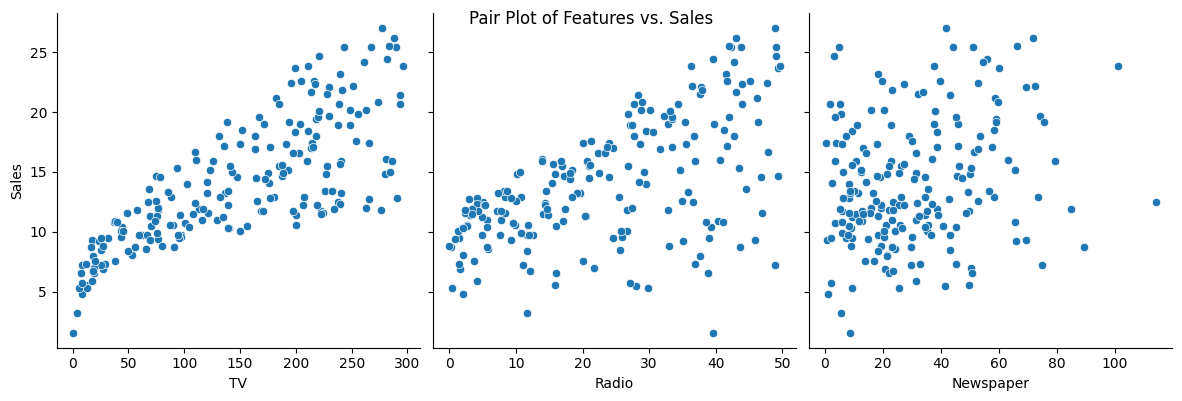

In [35]:
# Visualization: Pair Plot
sns.pairplot(data, x_vars=["TV", "Radio", "Newspaper"], y_vars=["Sales"], height=4)
plt.suptitle("Pair Plot of Features vs. Sales")
plt.show()

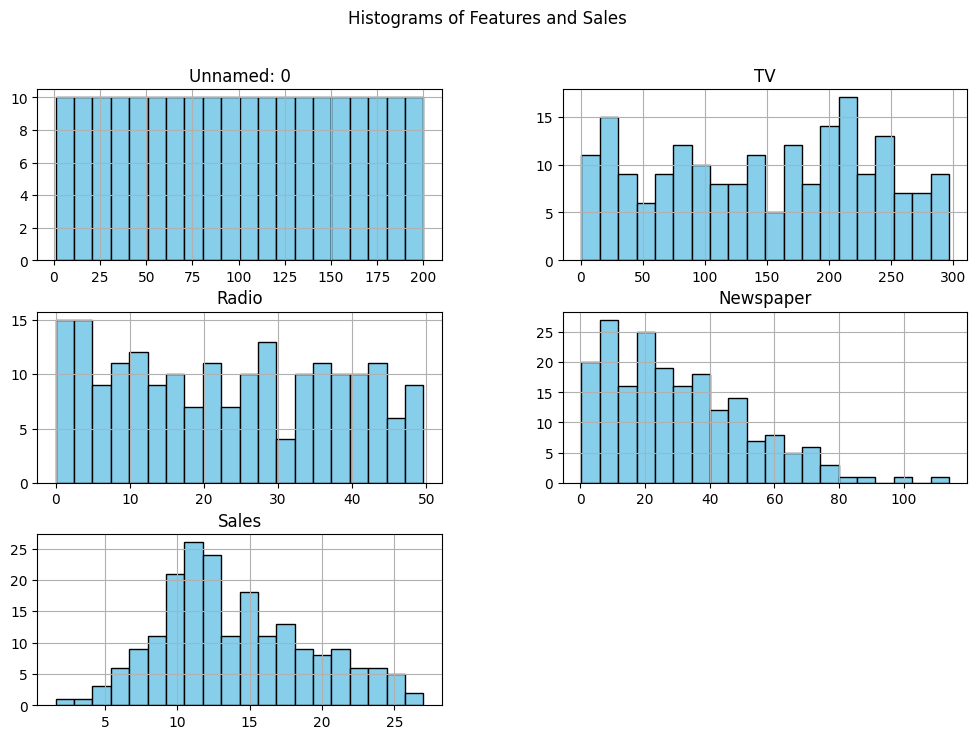

In [36]:
# Visualization: Histograms
data.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Features and Sales")
plt.show()

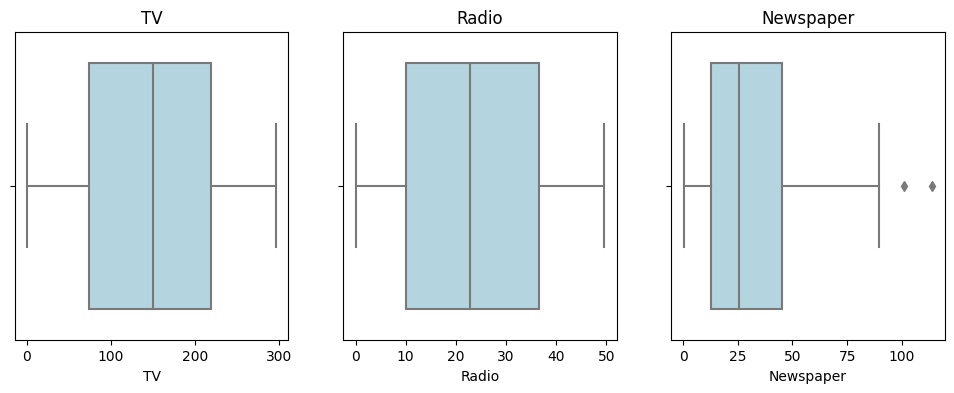

In [37]:
# Visualization: Box Plots
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.boxplot(x="TV", data=data, color='lightblue')
plt.title("TV")
plt.subplot(132)
sns.boxplot(x="Radio", data=data, color='lightblue')
plt.title("Radio")
plt.subplot(133)
sns.boxplot(x="Newspaper", data=data, color='lightblue')
plt.title("Newspaper")
plt.show()

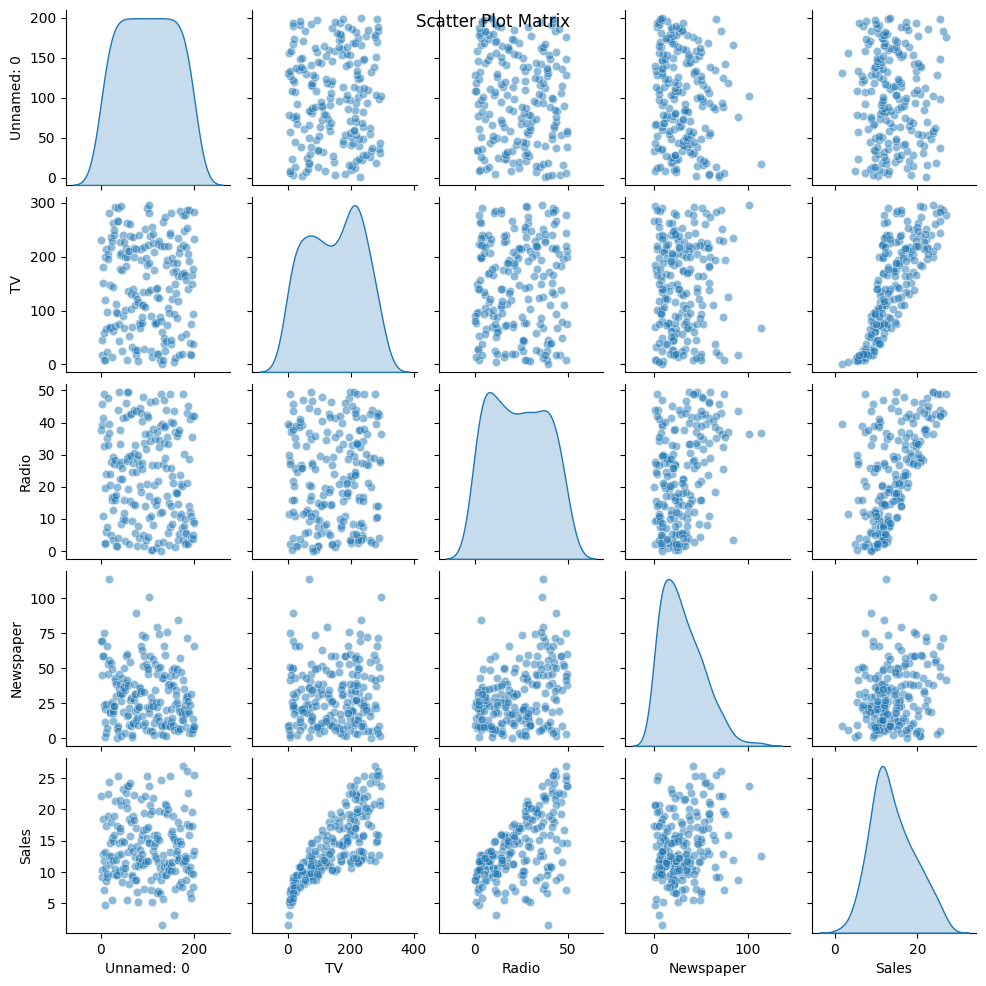

In [38]:
# Visualization: Scatter Plot Matrix
sns.pairplot(data, height=2, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Scatter Plot Matrix")
plt.show()

In [101]:
# Define a list of models to compare
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42))
]

# Define hyperparameters to search for each model
param_grids = {
    "Linear Regression": {},  # No hyperparameters for Linear Regression
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

In [106]:
best_model_name = None
best_score = 0
best_model_metrics = {}

# Dictionary to store model evaluation metrics
model_metrics = {}

# Compare models and select the best one
for model_name, model in models:
    param_grid = param_grids[model_name]

    if model_name == "Linear Regression":
        grid_search = model  # No hyperparameter tuning for Linear Regression
    else:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_metrics[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R-squared': r2
    }

    print(f"Model: {model_name}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("-------------------------------")

    if r2 > best_score:
        best_score = r2
        best_model_name = model_name
        best_model_metrics = model_metrics[model_name]

print(f"The best model is {best_model_name} with the following metrics:")
print(f"MAE: {best_model_metrics['MAE']:.2f}")
print(f"MSE: {best_model_metrics['MSE']:.2f}")
print(f"R-squared: {best_model_metrics['R-squared']:.2f}")

Model: Linear Regression
MAE: 0.96
MSE: 2.04
R-squared: 0.94
-------------------------------
Model: Random Forest
MAE: 0.63
MSE: 0.57
R-squared: 0.98
-------------------------------
Model: Decision Tree
MAE: 0.96
MSE: 2.04
R-squared: 0.94
-------------------------------
The best model is Random Forest with the following metrics:
MAE: 0.63
MSE: 0.57
R-squared: 0.98


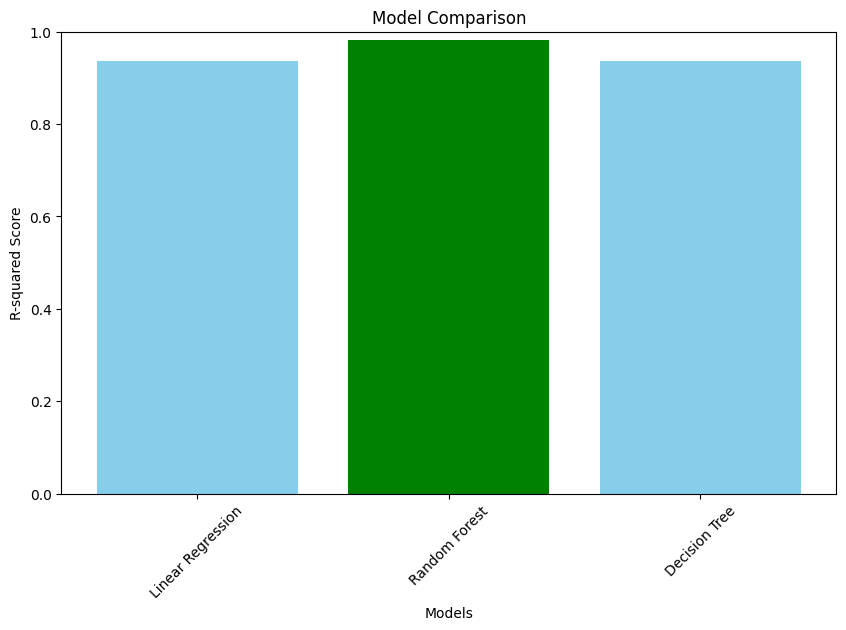

The best model is Random Forest with an R-squared of 0.98


In [66]:
# Create a bar chart to compare model performance
model_names = list(model_metrics.keys())
r2_scores = [metrics['R-squared'] for metrics in model_metrics.values()]

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Set the y-axis limit
plt.xticks(rotation=45)

# Highlight the best model with a different color
best_model_index = model_names.index(best_model_name)
plt.bar(model_names[best_model_index], r2_scores[best_model_index], color='green')

plt.show()

print(f"The best model is {best_model_name} with an R-squared of {best_score:.2f}")

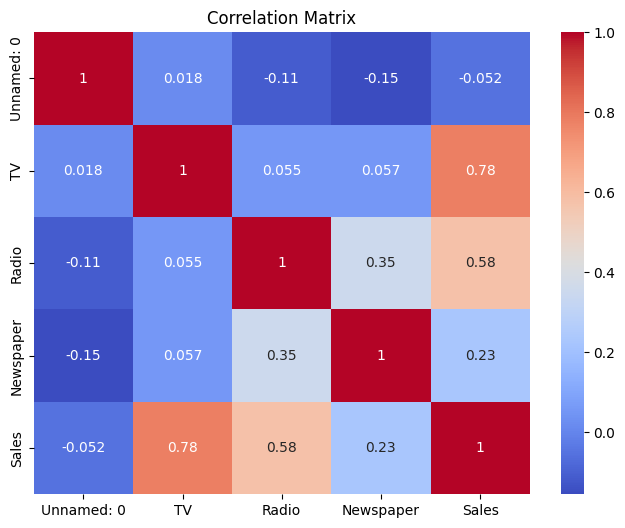

In [67]:
# Visualization: Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

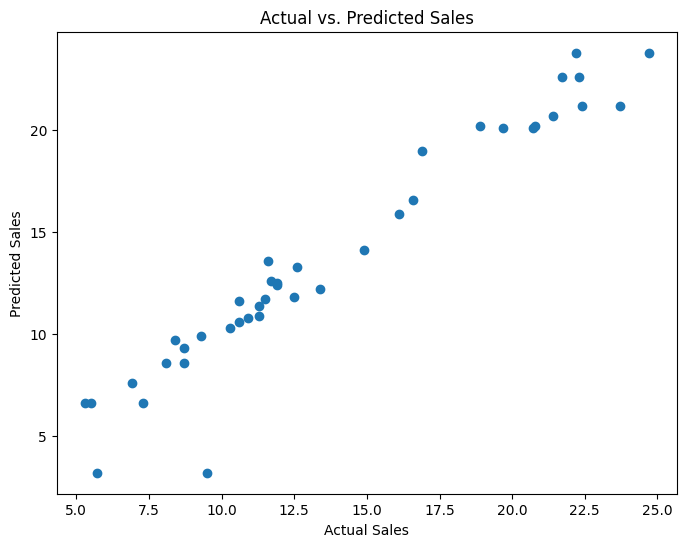

In [68]:
# Visualization: Actual vs. Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()